In [1]:
!pip install tensorflow==2.15
!pip install n2v

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 851.1 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.

In [2]:
import n2v
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os
import zipfile
from tensorflow.keras.callbacks import *
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import shutil

2024-04-08 23:25:19.628135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 23:25:19.628242: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 23:25:19.906180: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [22]:
datagen = N2V_DataGenerator()
dir = "/kaggle/input/deepspace"
imgs = datagen.load_imgs_from_directory(directory = dir, filter='*.png', dims='YXC')

In [23]:
for i in range(len(imgs)):
    print('shape of loaded images: ',imgs[i].shape)

shape of loaded images:  (1, 424, 424, 3)
shape of loaded images:  (1, 424, 424, 3)
shape of loaded images:  (1, 424, 424, 3)
shape of loaded images:  (1, 424, 424, 3)
shape of loaded images:  (1, 424, 424, 3)


In [25]:
patch_size = 32
patch_shape = (patch_size,patch_size)
patches = datagen.generate_patches_from_list(imgs, shape=patch_shape)

Generated patches: (1352, 32, 32, 3)
Generated patches: (1352, 32, 32, 3)
Generated patches: (1352, 32, 32, 3)
Generated patches: (1352, 32, 32, 3)
Generated patches: (1352, 32, 32, 3)


In [26]:
train_val_split = int(patches.shape[0] * 0.8)
X = patches[:train_val_split]
X_val = patches[train_val_split:]

In [27]:
batch_size = 64
config = N2VConfig(X, unet_kern_size=3, 
                   unet_n_first=64, unet_n_depth=3, train_steps_per_epoch=int(X.shape[0]/batch_size), train_epochs=20, train_loss='mse', 
                   batch_norm=True, train_batch_size=batch_size, n2v_perc_pix=0.198, n2v_patch_shape=(patch_size, patch_size), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, single_net_per_channel=False)

In [28]:
model_name = 'n2v_eclipse'
basedir = '/kaggle/working/'
model = N2V(config, model_name, basedir=basedir)

In [29]:
history = model.train(X, X_val)
output_dir = '/kaggle/working/n2v_eclipse'
shutil.make_archive('/kaggle/working/n2v_eclipse', 'zip', output_dir)

2 blind-spots will be generated per training patch of size (32, 32).


Preparing validation data: 100%|██████████| 1352/1352 [00:00<00:00, 2691.47it/s]


Epoch 1/20
84/84 [==============================] - 18s 87ms/step - loss: 0.4147 - n2v_mse: 0.4147 - n2v_abs: 0.3966 - val_loss: 0.6736 - val_n2v_mse: 0.6701 - val_n2v_abs: 0.5635 - lr: 4.0000e-04
Epoch 2/20
84/84 [==============================] - 5s 55ms/step - loss: 0.1759 - n2v_mse: 0.1759 - n2v_abs: 0.2711 - val_loss: 0.5270 - val_n2v_mse: 0.5239 - val_n2v_abs: 0.4950 - lr: 4.0000e-04
Epoch 3/20
84/84 [==============================] - 4s 51ms/step - loss: 0.1357 - n2v_mse: 0.1357 - n2v_abs: 0.2421 - val_loss: 0.4611 - val_n2v_mse: 0.4584 - val_n2v_abs: 0.4626 - lr: 4.0000e-04
Epoch 4/20
84/84 [==============================] - 4s 50ms/step - loss: 0.1356 - n2v_mse: 0.1356 - n2v_abs: 0.2435 - val_loss: 0.1510 - val_n2v_mse: 0.1500 - val_n2v_abs: 0.2411 - lr: 4.0000e-04
Epoch 5/20
84/84 [==============================] - 4s 50ms/step - loss: 0.1196 - n2v_mse: 0.1196 - n2v_abs: 0.2309 - val_loss: 0.0979 - val_n2v_mse: 0.0973 - val_n2v_abs: 0.2016 - lr: 4.0000e-04
Epoch 6/20
84/84 [=

'/kaggle/working/n2v_deepspace.zip'

In [41]:
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible
from skimage import exposure
from skimage.io import imsave

In [48]:
model_name = 'n2v_eclipse'
basedir = '/kaggle/working/'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


In [50]:
img = imread('/kaggle/input/eclipse/IMG_2340.png')

In [51]:
pred = model.predict(img, axes='YXC')

1/1 [==============================] - 0s 447ms/step


(-0.5, 3023.5, 4031.5, -0.5)

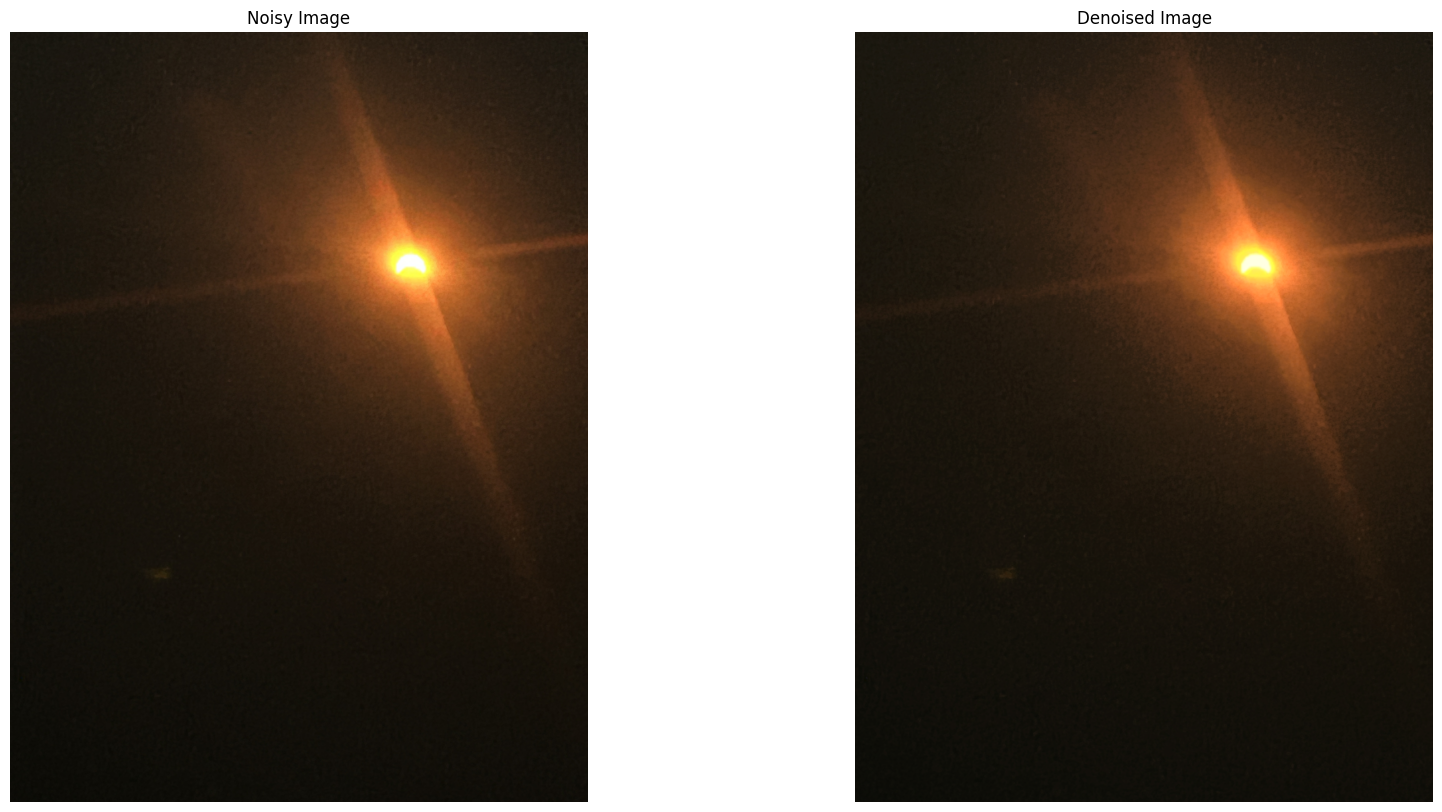

In [52]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Noisy Image');
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(pred)
plt.title('Denoised Image');
plt.axis('off')

In [53]:
pred_rescaled = exposure.rescale_intensity(pred, out_range=(0, 255)).astype(np.uint8)

save_path = '/kaggle/working/IMG_2340_denoise.png'
imsave(save_path, pred_rescaled)